In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\LoanApprovalPrediction.csv")

In [2]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.drop(['Loan_ID'], axis = 1, inplace = True)

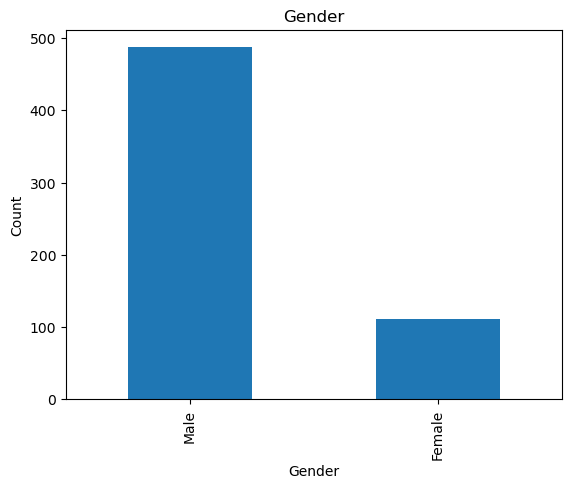

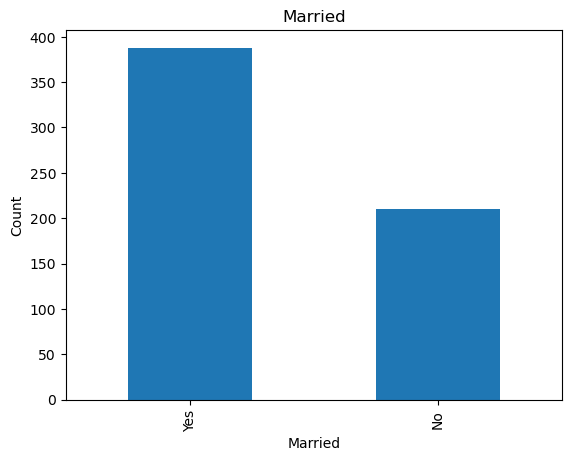

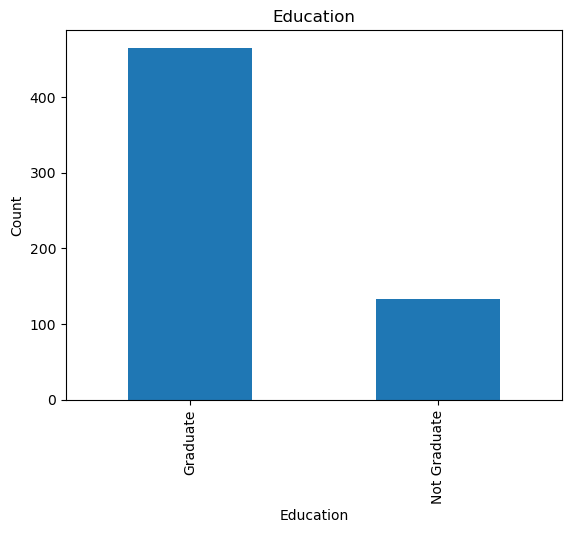

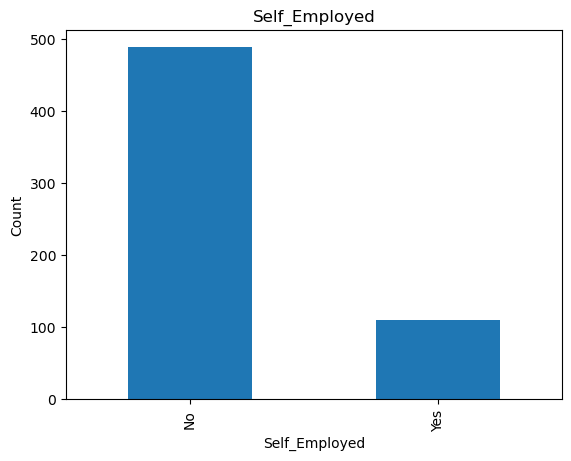

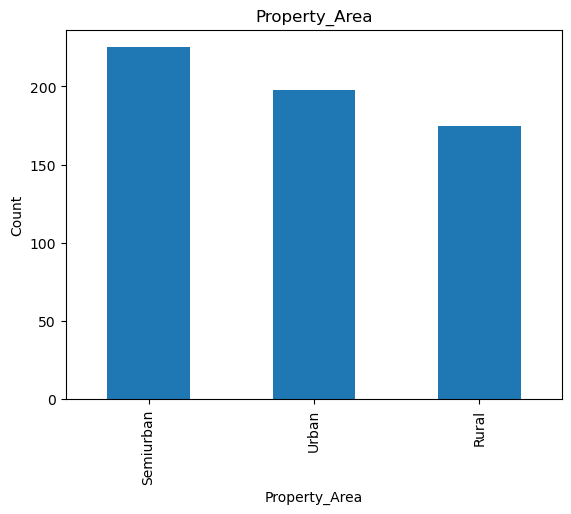

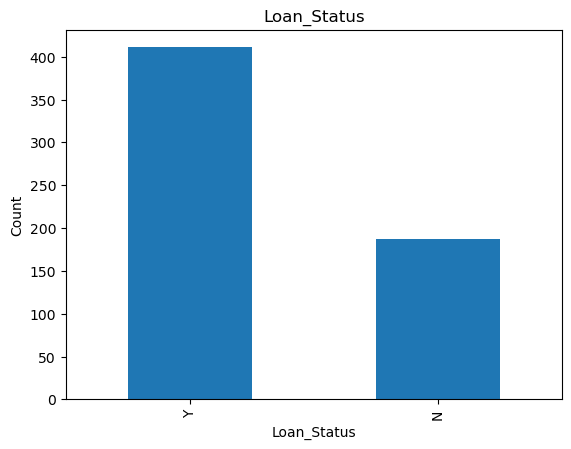

In [4]:
obj = data.select_dtypes(include = 'object').columns

for col in obj:
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

obj_cols = data.select_dtypes(include='object').columns
data[obj_cols] = data[obj_cols].apply(LabelEncoder().fit_transform)

In [6]:
obj = (data.dtypes == 'object')
print("Categotical variable: ", len(list(obj[obj].index)))

Categotical variable:  0


<Axes: >

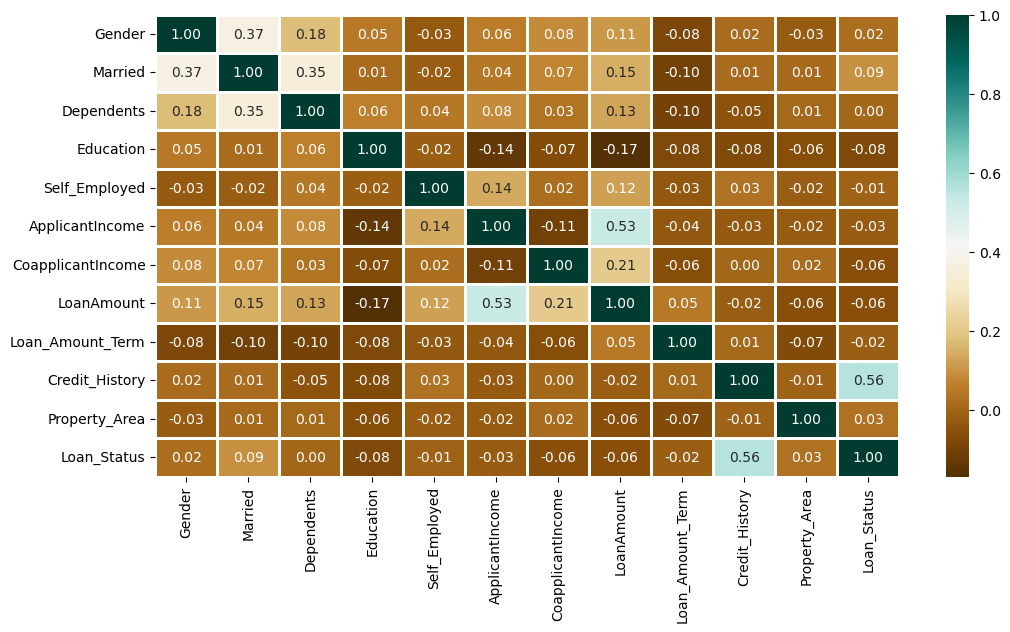

In [7]:
plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), cmap = 'BrBG', fmt= '.2f', linewidths = 2, annot = True)

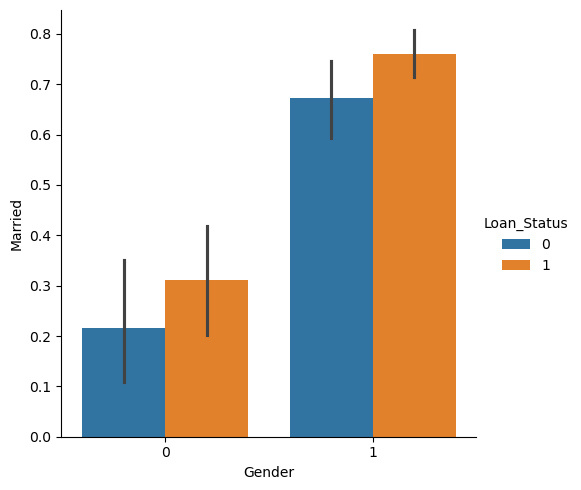

In [8]:
sns.catplot(x = "Gender", y = "Married", 
            hue = "Loan_Status", 
            kind = "bar",
            data = data) 

In [9]:
data = data.fillna(data.mean())
print(data.isna().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

x = data.drop(['Loan_Status'], axis = 1)
y = data['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 1)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RFC = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 7)
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_train)
print("Accuracy Score of Random Forest Calssifier =", 100 * metrics.accuracy_score(y_train, y_pred))

Accuracy Score of Random Forest Calssifier = 96.02510460251045
